<a href="https://colab.research.google.com/github/Jungsan005/Bigdata-Class/blob/master/%EC%98%81%EC%9C%A0%EC%95%84pjt_TableMerge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 기본설정 (한글 등)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings

%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()
warnings.filterwarnings(action='ignore')

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.


## 데이터 변형

링크형태로 깃허브 데이터를 설정

In [ ]:
url_baby = 'https://raw.githubusercontent.com/Jungsan005/Bigdata-Class/master/datasets/pop_day.csv'
url_capa = 'https://raw.githubusercontent.com/Jungsan005/Bigdata-Class/master/datasets/%EC%9C%A0%EC%B9%98%EC%9B%90db_pivot.csv'
url_hprice = 'https://raw.githubusercontent.com/Jungsan005/Bigdata-Class/master/2010_2019%20%EC%84%9C%EC%9A%B8%EC%8B%9C%20%EB%B6%80%EB%8F%99%EC%82%B0%20%EB%A7%A4%EB%A7%A4%20%ED%8F%89%EB%8B%B9%EA%B0%80%EA%B2%A92.csv'
url_price = 'https://raw.githubusercontent.com/Jungsan005/Bigdata-Class/master/SeoulTrade.csv'
url_hrent = 'https://raw.githubusercontent.com/Jungsan005/Bigdata-Class/master/datasets/%EC%A0%84%EC%9B%94%EC%84%B8%ED%8F%89%EB%8B%B9%EA%B8%88%EC%95%A1.csv'
url_ncapa = 'https://raw.githubusercontent.com/Jungsan005/Bigdata-Class/master/datasets/%EA%B3%B5%EA%B3%B5%EC%96%B4%EB%A6%B0%EC%9D%B4%EC%A7%91.csv'

### 영유아 아동 통계 
기본데이터를 raw형태의 데이터로 변경

In [ ]:
df_baby = pd.read_csv(url_baby)
df_baby.head(1)

,Unnamed: 0,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,노원구,은평구,서대문구,마포구,양천구,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,2010-01,6420.0,5725.0,11797.0,16416.0,17564.0,16889.0,19965.0,25735.0,15480.0,17426.0,31418.0,23288.0,15660.0,21165.0,23404.0,32152.0,24889.0,11604.0,22597.0,20383.0,25387.0,21112.0,23460.0,35186.0,24642.0


In [ ]:
df_baby = pd.read_csv(url_baby)
df_baby.index = df_baby['Unnamed: 0'] # 날짜를 인덱스로 설정
df_baby = df_baby.drop('Unnamed: 0',axis=1) # 날짜 컬럼 drop
df_baby_1 = df_baby.stack(level=-1) # -1레벨기준 stack 화 ((날짜,구)의 멀티인덱스 지닌 Series 생성)
df_baby_2 = df_baby_1.apply(pd.Series) # series를 df로 변환 ((날짜,구)의 멀티인덱스 지닌 df생성)
df_baby_3 = df_baby_2.reset_index() # multi index 해제
df_baby = df_baby_3
df_baby.columns = ['date','gu','baby'] #raw 형태의 데이터 완성

#### 단계별 변화 설명

In [ ]:
df_baby_1.head(5)

Unnamed: 0     
2010-01     종로구     6420.0
            중구      5725.0
            용산구    11797.0
            성동구    16416.0
            광진구    17564.0
dtype: float64

In [ ]:
df_baby_2.head(5)

0
Unnamed: 0             
2010-01    종로구   6420.0
           중구    5725.0
           용산구  11797.0
           성동구  16416.0
           광진구  17564.0

In [ ]:
df_baby_3.head(5)

,date,gu,baby
0,2010-01,종로구,6420.0
1,2010-01,중구,5725.0
2,2010-01,용산구,11797.0
3,2010-01,성동구,16416.0
4,2010-01,광진구,17564.0


In [ ]:
df_baby.head(1)

,date,gu,baby
0,2010-01,종로구,6420.0


### 어린이집 현원/정원

In [ ]:
df_flt = pd.read_csv(url_capa, encoding = 'euc-kr',header=1)

# 유치원 현황 데이터 가져온 후, date 컬럼 생성
df_flt_cap = df_flt.iloc[1:,:26]
df_flt_cap['date'] = df_flt_cap.sigungu.apply(lambda x : x[:7])
df_flt_cap = df_flt_cap.drop('sigungu', axis=1)

# 유치원 현황데이터를 현원, 정원, 정원율 df로 구분 생성
df_flt_cur = pd.read_csv(url_capa, encoding = 'euc-kr',header=1).iloc[1:,26:51]
df_flt_cur['date'] = df_flt_cap['date']
df_flt_ratio = pd.read_csv(url_capa, encoding = 'euc-kr',header=1).iloc[1:,51:]
df_flt_ratio['date']  = df_flt_cap['date']

df_flt_cur.columns = df_flt_cap.columns
df_flt_ratio.columns = df_flt_cap.columns

정원 df

In [ ]:
df_flt_cap.index = df_flt_cap['date'] # 날짜를 인덱스로
df_flt_cap = df_flt_cap.drop('date',axis=1)
df_flt_cap = df_flt_cap.stack(level = -1) # -1레벨기준 stack 화
df_flt_cap = df_flt_cap.apply(pd.Series) # series를 df로 변환
df_flt_cap = df_flt_cap.reset_index() # multi index 해제

df_flt_cap.columns = ['date','gu','어린이집_정원']

현원df

In [ ]:
df_flt_cur.index = df_flt_cur['date']
df_flt_cur = df_flt_cur.drop('date',axis=1)
df_flt_cur = df_flt_cur.stack(level = -1)
df_flt_cur = df_flt_cur.apply(pd.Series)
df_flt_cur = df_flt_cur.reset_index()

df_flt_cur.columns = ['date','gu','어린이집_현원']

정원율df

In [ ]:
df_flt_ratio.index = df_flt_ratio['date']
df_flt_ratio = df_flt_ratio.drop('date',axis=1)
df_flt_ratio = df_flt_ratio.stack(level = -1)
df_flt_ratio = df_flt_ratio.apply(pd.Series)
df_flt_ratio = df_flt_ratio.reset_index()

df_flt_ratio.columns = ['date','gu','어린이집_정원률']

df_ncapa = pd.read_csv(url_ncapa, encoding='euc-kr',index_col=0)

### 단위당가격df, 단위당rent df

In [ ]:
df_price = pd.read_csv(url_price)
df_price['date'] = df_price.year.apply(lambda x : str(x)) +'-' + df_price.month.apply(lambda x : str(x).zfill(2))
df_price = df_price.drop(['year','month'],axis=1)
df_price.columns = ['gu',	'단위당가격',	'date']
df_hrent = pd.read_csv(url_hrent,index_col=0)
df_hrent.columns = ['gu','date'	,'단위당보증금',	'단위당월세']


### 데이터 병합

* 'date', 'gu'를 기준으로 df 병합
* inner방식으로 병합하여 na없는 데이터 가용

In [ ]:
df

,date,gu,영유아인구,어린이집_정원률,공공_정원률,어린이집_현원,공공_현원,어린이집_정원,공공_정원,단위당가격,단위당보증금,단위당월세


In [ ]:
df = pd.merge(df_baby,df_flt_ratio,how='inner',on=['date','gu'])
df = pd.merge(df,df_flt_cur,how='inner',on=['date','gu'])
df = pd.merge(df,df_flt_cap,how='inner',on=['date','gu'])
df = pd.merge(df,df_hrent,how='inner',on=['date','gu'])
df = pd.merge(df,df_price,how='inner',on=['date','gu'])
df = pd.merge(df,df_ncapa,how='inner',on=['date','gu'])
df = df[['date', 'gu', 'baby', '어린이집_정원률','공공_정원율', '어린이집_현원','공공_현원', '어린이집_정원', '공공_정원','단위당가격', '단위당보증금', '단위당월세']]
df.columns = ['date', 'gu', '영유아인구', '어린이집_정원률','공공_정원률', '어린이집_현원','공공_현원', '어린이집_정원', '공공_정원','단위당가격', '단위당보증금', '단위당월세']
df

,date,gu,영유아인구,어린이집_정원률,공공_정원률,어린이집_현원,공공_현원,어린이집_정원,공공_정원,단위당가격,단위당보증금,단위당월세
0,2016-09,종로구,5225.0,0.793885,0.848300,3921.0,1672,4939.0,1971,666.9,433.257895,0.352632
1,2016-09,중구,5126.0,0.842245,0.907701,3481.0,1603,4133.0,1766,636.0,337.854348,0.668478
2,2016-09,용산구,10108.0,0.888597,0.886941,4730.0,1467,5323.0,1654,829.3,353.585185,0.705556
3,2016-09,성동구,14735.0,0.865920,0.890298,6962.0,3441,8040.0,3865,626.9,235.057971,0.606522
4,2016-09,광진구,15443.0,0.860475,0.923150,7709.0,1934,8959.0,2095,592.5,286.766667,0.282576
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2019-12,관악구,14442.0,0.825807,0.881568,9107.0,4094,11028.0,4644,668.6,365.815678,0.000000
996,2019-12,서초구,18455.0,0.864407,0.900160,8976.0,4499,10384.0,4998,1134.5,371.930405,0.444257
997,2019-12,강남구,19341.0,0.825850,0.862366,8958.0,4198,10847.0,4868,1291.7,547.066949,0.668432
998,2019-12,송파구,30111.0,0.919213,0.934356,15520.0,5238,16884.0,5606,899.9,511.435180,1.144321


## 데이터 분석/시각화


### 상관관계 확인

In [ ]:
df.corr()

,영유아인구,어린이집_정원률,공공_정원률,어린이집_현원,공공_현원,어린이집_정원,공공_정원,단위당가격,단위당보증금,단위당월세
영유아인구,1.000000,0.156779,0.162900,0.893932,0.663361,0.929033,0.666106,-0.068602,-0.078373,0.055751
어린이집_정원률,0.156779,1.000000,0.942678,0.411641,0.420409,0.106564,0.113471,0.024387,0.089232,-0.041680
공공_정원률,0.162900,0.942678,1.000000,0.428795,0.382625,0.146530,0.056712,-0.067351,0.004059,-0.078544
어린이집_현원,0.893932,0.411641,0.428795,1.000000,0.690144,0.944762,0.592002,-0.245051,-0.119032,-0.058289
공공_현원,0.663361,0.420409,0.382625,0.690144,1.000000,0.609966,0.939521,0.192114,0.141268,0.032111
어린이집_정원,0.929033,0.106564,0.146530,0.944762,0.609966,1.000000,0.613808,-0.275735,-0.158248,-0.068999
공공_정원,0.666106,0.113471,0.056712,0.592002,0.939521,0.613808,1.000000,0.224613,0.147076,0.049055
단위당가격,-0.068602,0.024387,-0.067351,-0.245051,0.192114,-0.275735,0.224613,1.000000,0.675193,0.519966
단위당보증금,-0.078373,0.089232,0.004059,-0.119032,0.141268,-0.158248,0.147076,0.675193,1.000000,0.308785
단위당월세,0.055751,-0.041680,-0.078544,-0.058289,0.032111,-0.068999,0.049055,0.519966,0.308785,1.000000


시각화

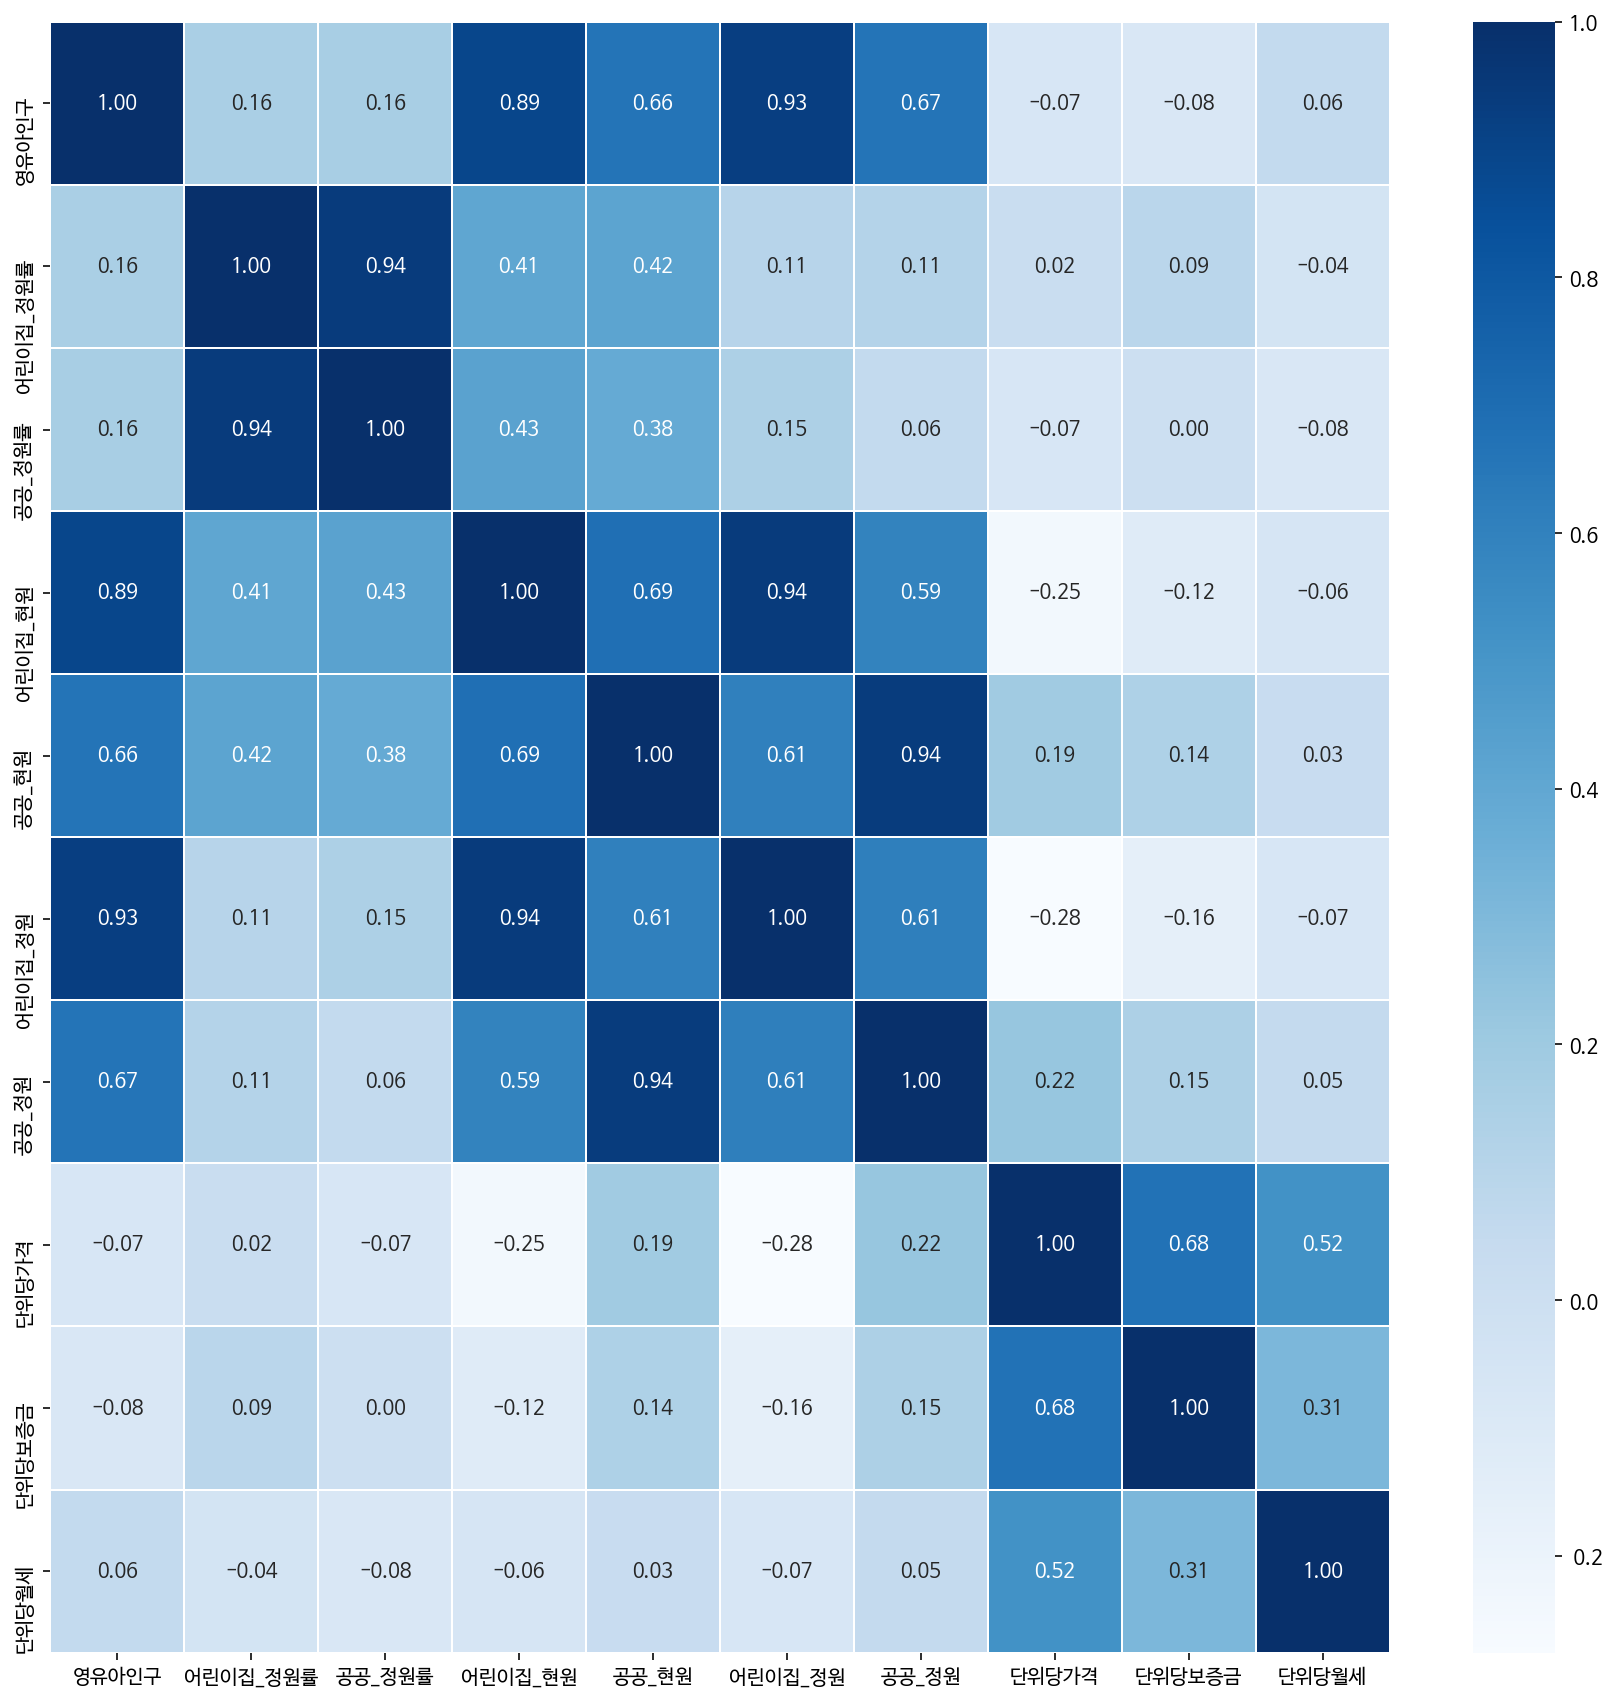

In [ ]:
import seaborn as sns
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

### 기준별 상위 구 확인

최근 주택가격 순

In [ ]:
df[df.date =='2019-12'].sort_values('단위당월세',ascending=False)[:10]

,date,gu,영유아인구,어린이집_정원률,공공_정원률,어린이집_현원,공공_현원,어린이집_정원,공공_정원,단위당가격,단위당보증금,단위당월세
998,2019-12,송파구,30111.0,0.919213,0.934356,15520.0,5238,16884.0,5606,899.9,511.435180,1.144321
975,2019-12,종로구,4417.0,0.733661,0.754318,3581.0,1747,4881.0,2316,835.3,255.193878,0.803061
997,2019-12,강남구,19341.0,0.825850,0.862366,8958.0,4198,10847.0,4868,1291.7,547.066949,0.668432
999,2019-12,강동구,18013.0,0.883233,0.928437,10809.0,3944,12238.0,4248,730.3,359.722314,0.665702
976,2019-12,중구,4459.0,0.787621,0.832268,3512.0,1692,4459.0,2033,1101.5,450.425253,0.656061
979,2019-12,광진구,12108.0,0.850018,0.908104,6937.0,2510,8161.0,2764,783.0,366.465789,0.483333
996,2019-12,서초구,18455.0,0.864407,0.900160,8976.0,4499,10384.0,4998,1134.5,371.930405,0.444257
978,2019-12,성동구,13498.0,0.863429,0.869716,7005.0,4012,8113.0,4613,1021.7,329.758889,0.341944
977,2019-12,용산구,8256.0,0.882069,0.901523,4570.0,1776,5181.0,1970,1257.4,568.690909,0.296970
990,2019-12,강서구,25241.0,0.857887,0.885419,14500.0,4196,16902.0,4739,657.0,390.125202,0.000000


In [ ]:
df[df.date =='2019-12'].sort_values('단위당가격',ascending=False)[:10]

,date,gu,영유아인구,어린이집_정원률,공공_정원률,어린이집_현원,공공_현원,어린이집_정원,공공_정원,단위당가격,단위당보증금,단위당월세
997,2019-12,강남구,19341.0,0.825850,0.862366,8958.0,4198,10847.0,4868,1291.7,547.066949,0.668432
977,2019-12,용산구,8256.0,0.882069,0.901523,4570.0,1776,5181.0,1970,1257.4,568.690909,0.296970
996,2019-12,서초구,18455.0,0.864407,0.900160,8976.0,4499,10384.0,4998,1134.5,371.930405,0.444257
976,2019-12,중구,4459.0,0.787621,0.832268,3512.0,1692,4459.0,2033,1101.5,450.425253,0.656061
978,2019-12,성동구,13498.0,0.863429,0.869716,7005.0,4012,8113.0,4613,1021.7,329.758889,0.341944
988,2019-12,마포구,15567.0,0.863390,0.867654,7976.0,3868,9238.0,4458,993.9,430.267294,0.000000
993,2019-12,영등포구,15527.0,0.862331,0.905439,10210.0,3629,11840.0,4008,900.3,500.229684,0.000000
998,2019-12,송파구,30111.0,0.919213,0.934356,15520.0,5238,16884.0,5606,899.9,511.435180,1.144321
994,2019-12,동작구,15273.0,0.873137,0.883644,8142.0,3463,9325.0,3919,847.0,274.056000,0.000000
980,2019-12,동대문구,12801.0,0.851102,0.886834,7568.0,3260,8892.0,3676,846.5,362.888462,0.000000


In [ ]:
df[df.date =='2019-12'].sort_values('단위당보증금',ascending=False)[:10]

,date,gu,영유아인구,어린이집_정원률,공공_정원률,어린이집_현원,공공_현원,어린이집_정원,공공_정원,단위당가격,단위당보증금,단위당월세
977,2019-12,용산구,8256.0,0.882069,0.901523,4570.0,1776,5181.0,1970,1257.4,568.690909,0.296970
997,2019-12,강남구,19341.0,0.825850,0.862366,8958.0,4198,10847.0,4868,1291.7,547.066949,0.668432
998,2019-12,송파구,30111.0,0.919213,0.934356,15520.0,5238,16884.0,5606,899.9,511.435180,1.144321
993,2019-12,영등포구,15527.0,0.862331,0.905439,10210.0,3629,11840.0,4008,900.3,500.229684,0.000000
976,2019-12,중구,4459.0,0.787621,0.832268,3512.0,1692,4459.0,2033,1101.5,450.425253,0.656061
987,2019-12,서대문구,11667.0,0.892125,0.905890,6095.0,2830,6832.0,3124,769.9,445.315094,0.000000
989,2019-12,양천구,16649.0,0.839935,0.858441,9755.0,4063,11614.0,4733,658.4,436.525773,0.000000
988,2019-12,마포구,15567.0,0.863390,0.867654,7976.0,3868,9238.0,4458,993.9,430.267294,0.000000
990,2019-12,강서구,25241.0,0.857887,0.885419,14500.0,4196,16902.0,4739,657.0,390.125202,0.000000
992,2019-12,금천구,8038.0,0.824068,0.866508,6389.0,2551,7753.0,2944,583.5,380.155497,0.000000


In [ ]:
# 영유아 증감에 따른 정원률 영향
영유아정원률 = dict()
for g in np.unique(df.gu.values):
  영유아정원률[g] = round(df[df.gu==g].corr()['영유아인구']['공공_정원률'],3)
pd.Series(영유아정원률).sort_values(ascending=False)

종로구     0.332
성북구     0.265
중구      0.235
강남구     0.210
동작구     0.209
강북구     0.117
도봉구     0.111
중랑구     0.095
양천구     0.091
구로구     0.064
노원구     0.060
은평구     0.060
서초구     0.040
강서구     0.037
금천구     0.034
관악구     0.025
마포구     0.001
동대문구   -0.005
성동구    -0.032
서대문구   -0.060
강동구    -0.069
용산구    -0.082
송파구    -0.092
광진구    -0.150
영등포구   -0.184
dtype: float64

In [ ]:
# 매매가 증감에 따른 정원률 영향
매매가정원률 = dict()
for g in np.unique(df.gu.values):
  매매가정원률[g] = round(df[df.gu==g].corr()['단위당가격']['공공_정원률'],3)
pd.Series(매매가정원률).sort_values(ascending=False)

영등포구    0.272
서대문구    0.164
광진구     0.135
동대문구    0.090
양천구     0.081
서초구     0.081
성동구     0.072
구로구     0.064
금천구     0.060
용산구     0.054
강북구     0.048
강서구     0.045
마포구     0.025
중랑구    -0.012
송파구    -0.024
관악구    -0.034
강동구    -0.040
동작구    -0.125
강남구    -0.126
성북구    -0.153
은평구    -0.165
노원구    -0.191
도봉구    -0.196
종로구    -0.248
중구     -0.357
dtype: float64

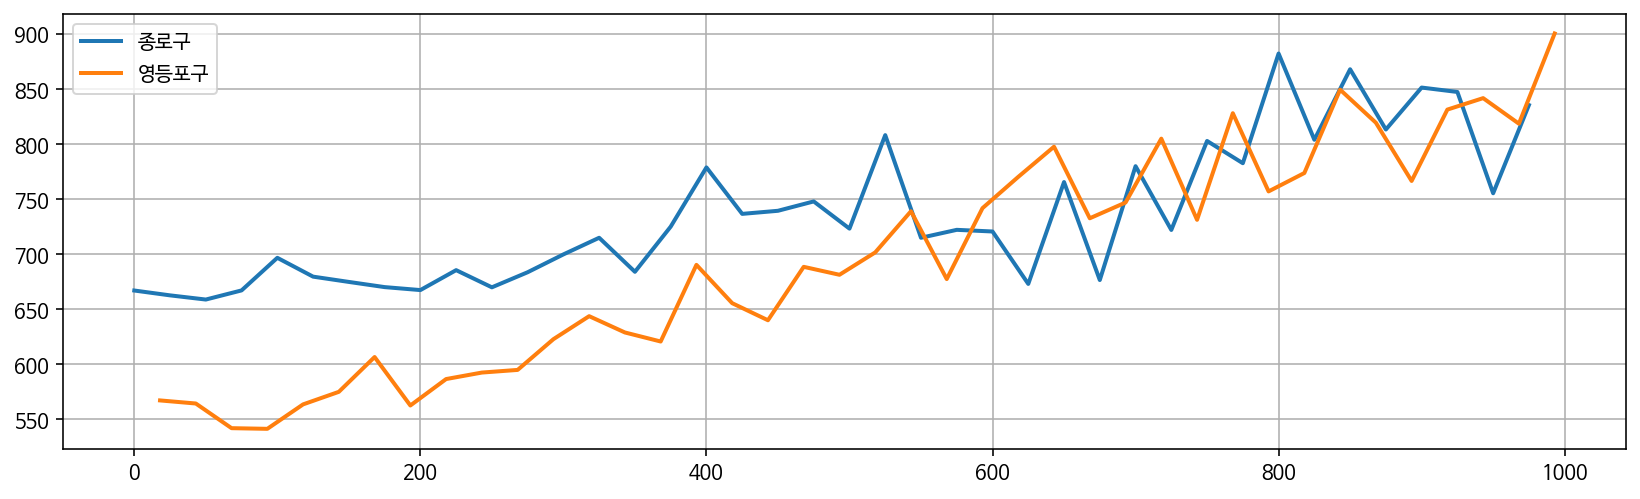

In [ ]:
df[df.gu=='종로구']['단위당가격'].plot(label='종로구' ,legend='종로구')
df[df.gu=='영등포구']['단위당가격'].plot(label='영등포구' ,legend='영등포구')

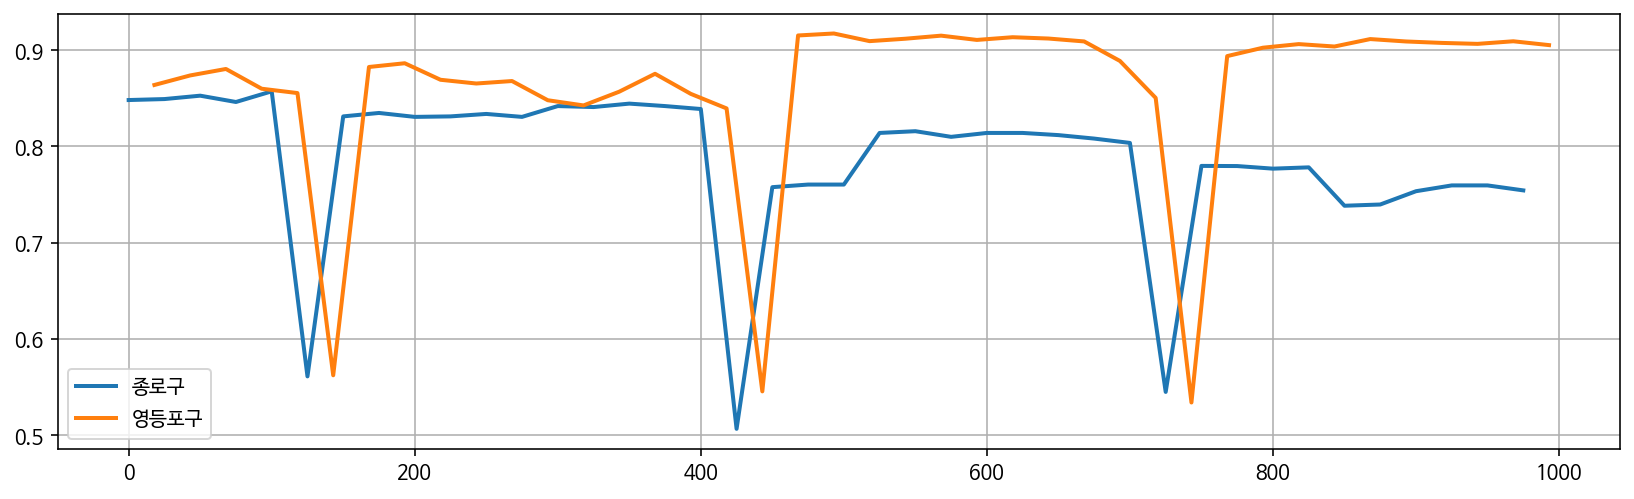

In [ ]:
df[df.gu=='종로구']['공공_정원률'].plot(label='종로구' ,legend='종로구')
df[df.gu=='영등포구']['공공_정원률'].plot(label='영등포구' ,legend='영등포구')

영유아 인구 감소로 정원율이 감소되고 있는 지역

강남구, 성북구, 동작구 등 인구 감소에도 정원의 유지로 정원률이 떨어지고 있음

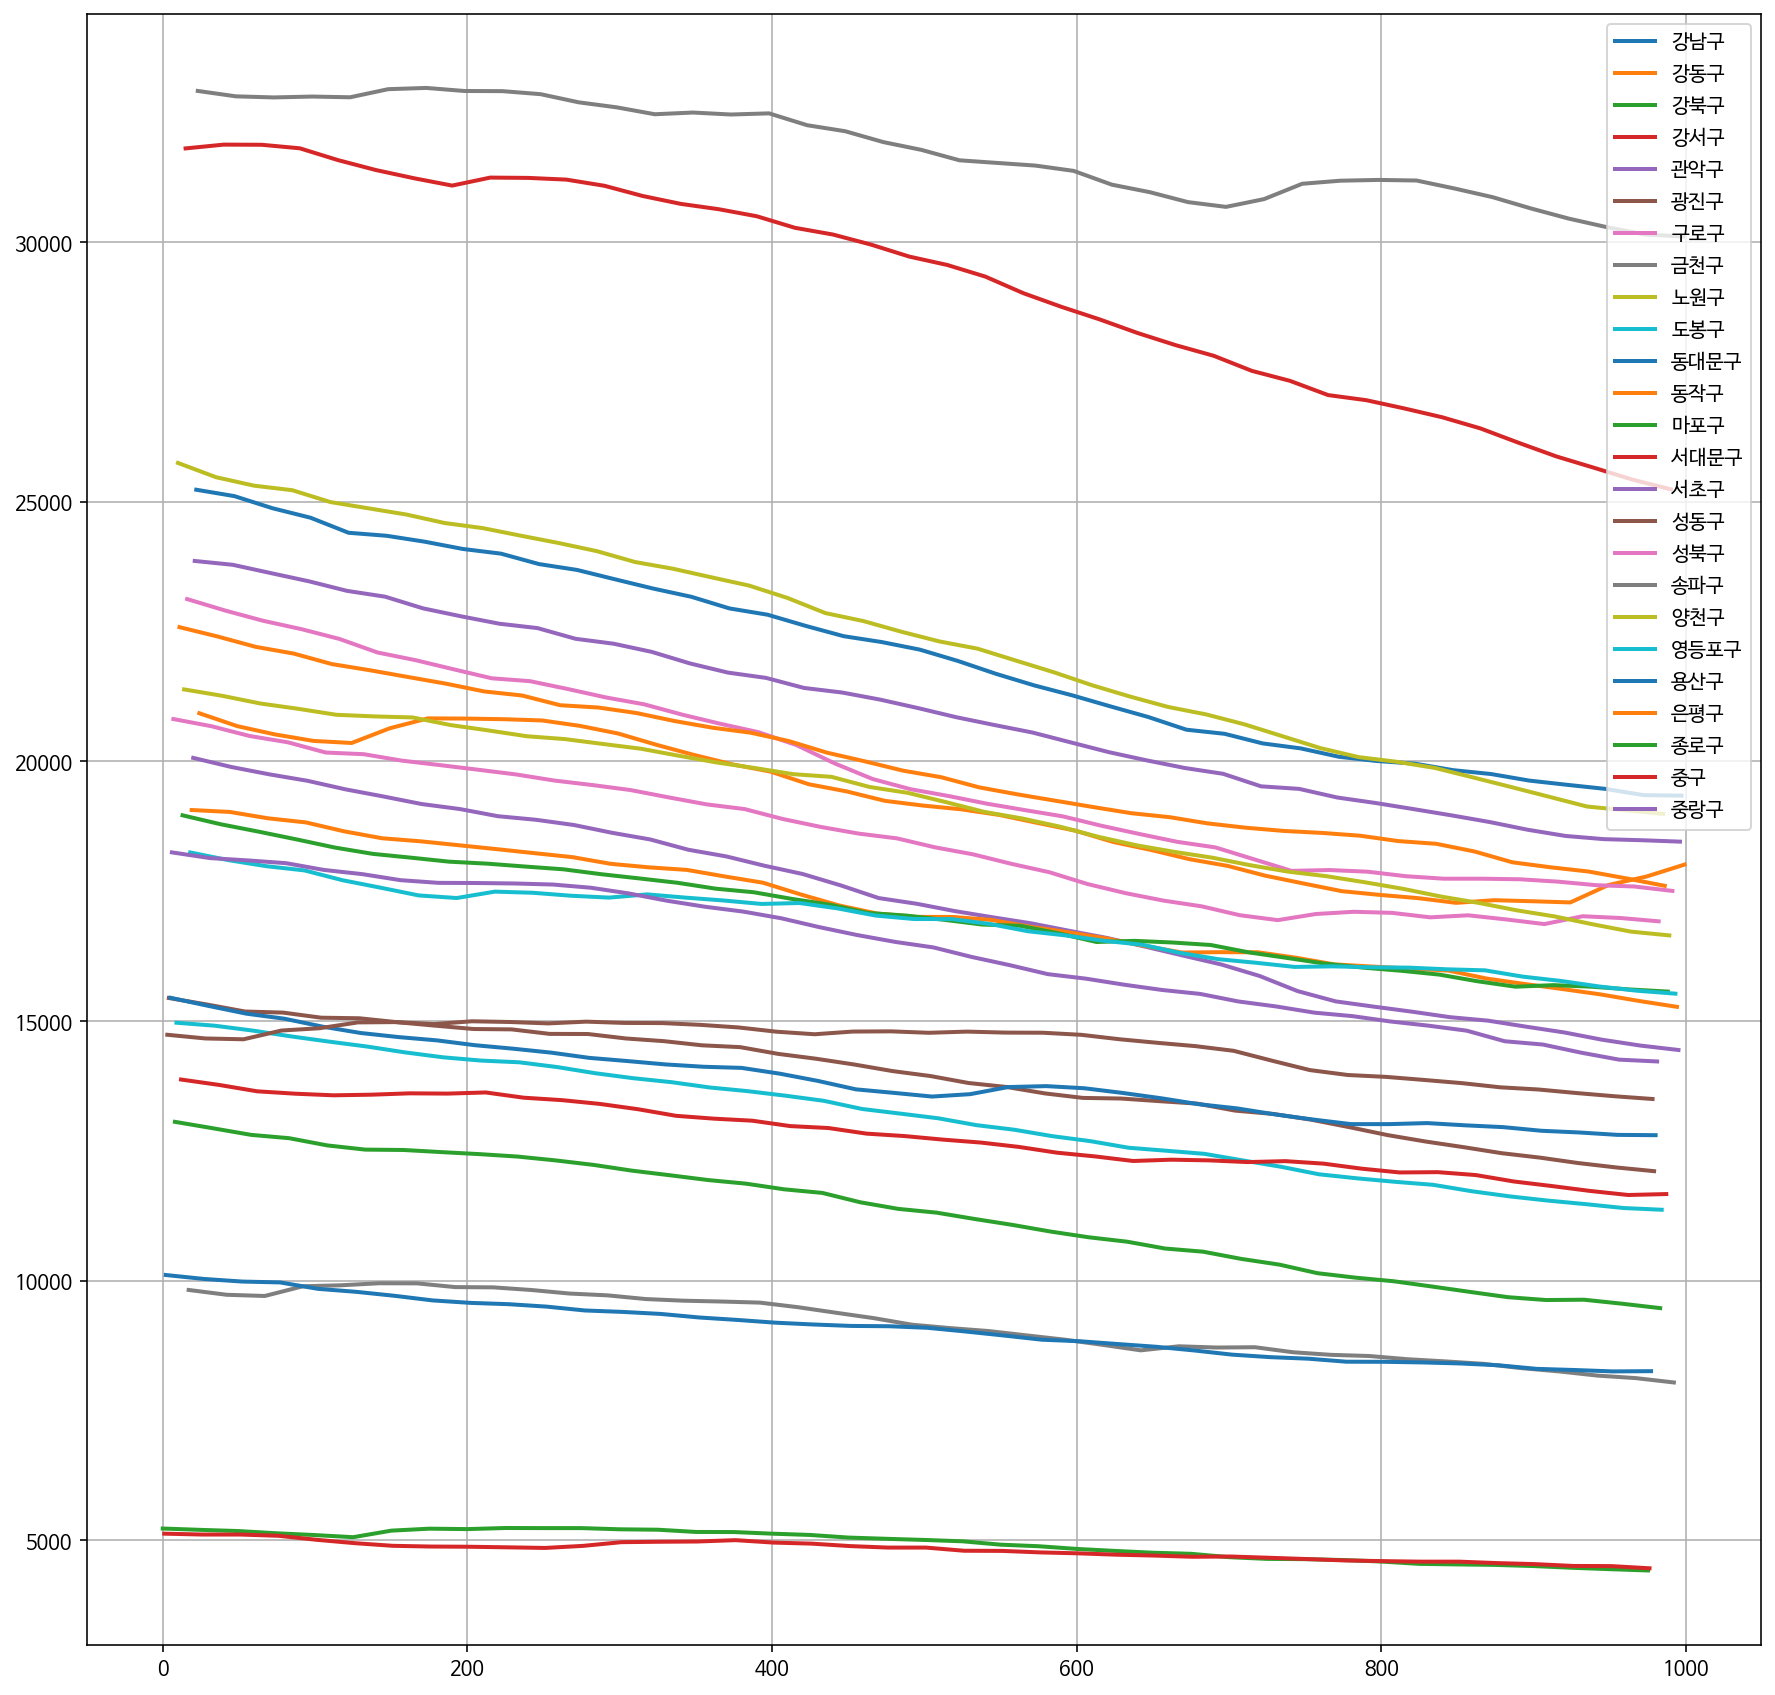

In [ ]:
plt.figure(figsize = (15,15))
for g in np.unique(df.gu.values):
  df[df.gu==g]['영유아인구'].plot(label=g ,legend=g)

정원율이 높은 수준으로 유지되는 구 : 강동구, 용산구, 송파구, 광진구, 영등포구
<br>
영유아 아동의 감소율이 적음에도 공공어린이집 정원 공급이 뒷받혀주지 않아서 정원율 상승

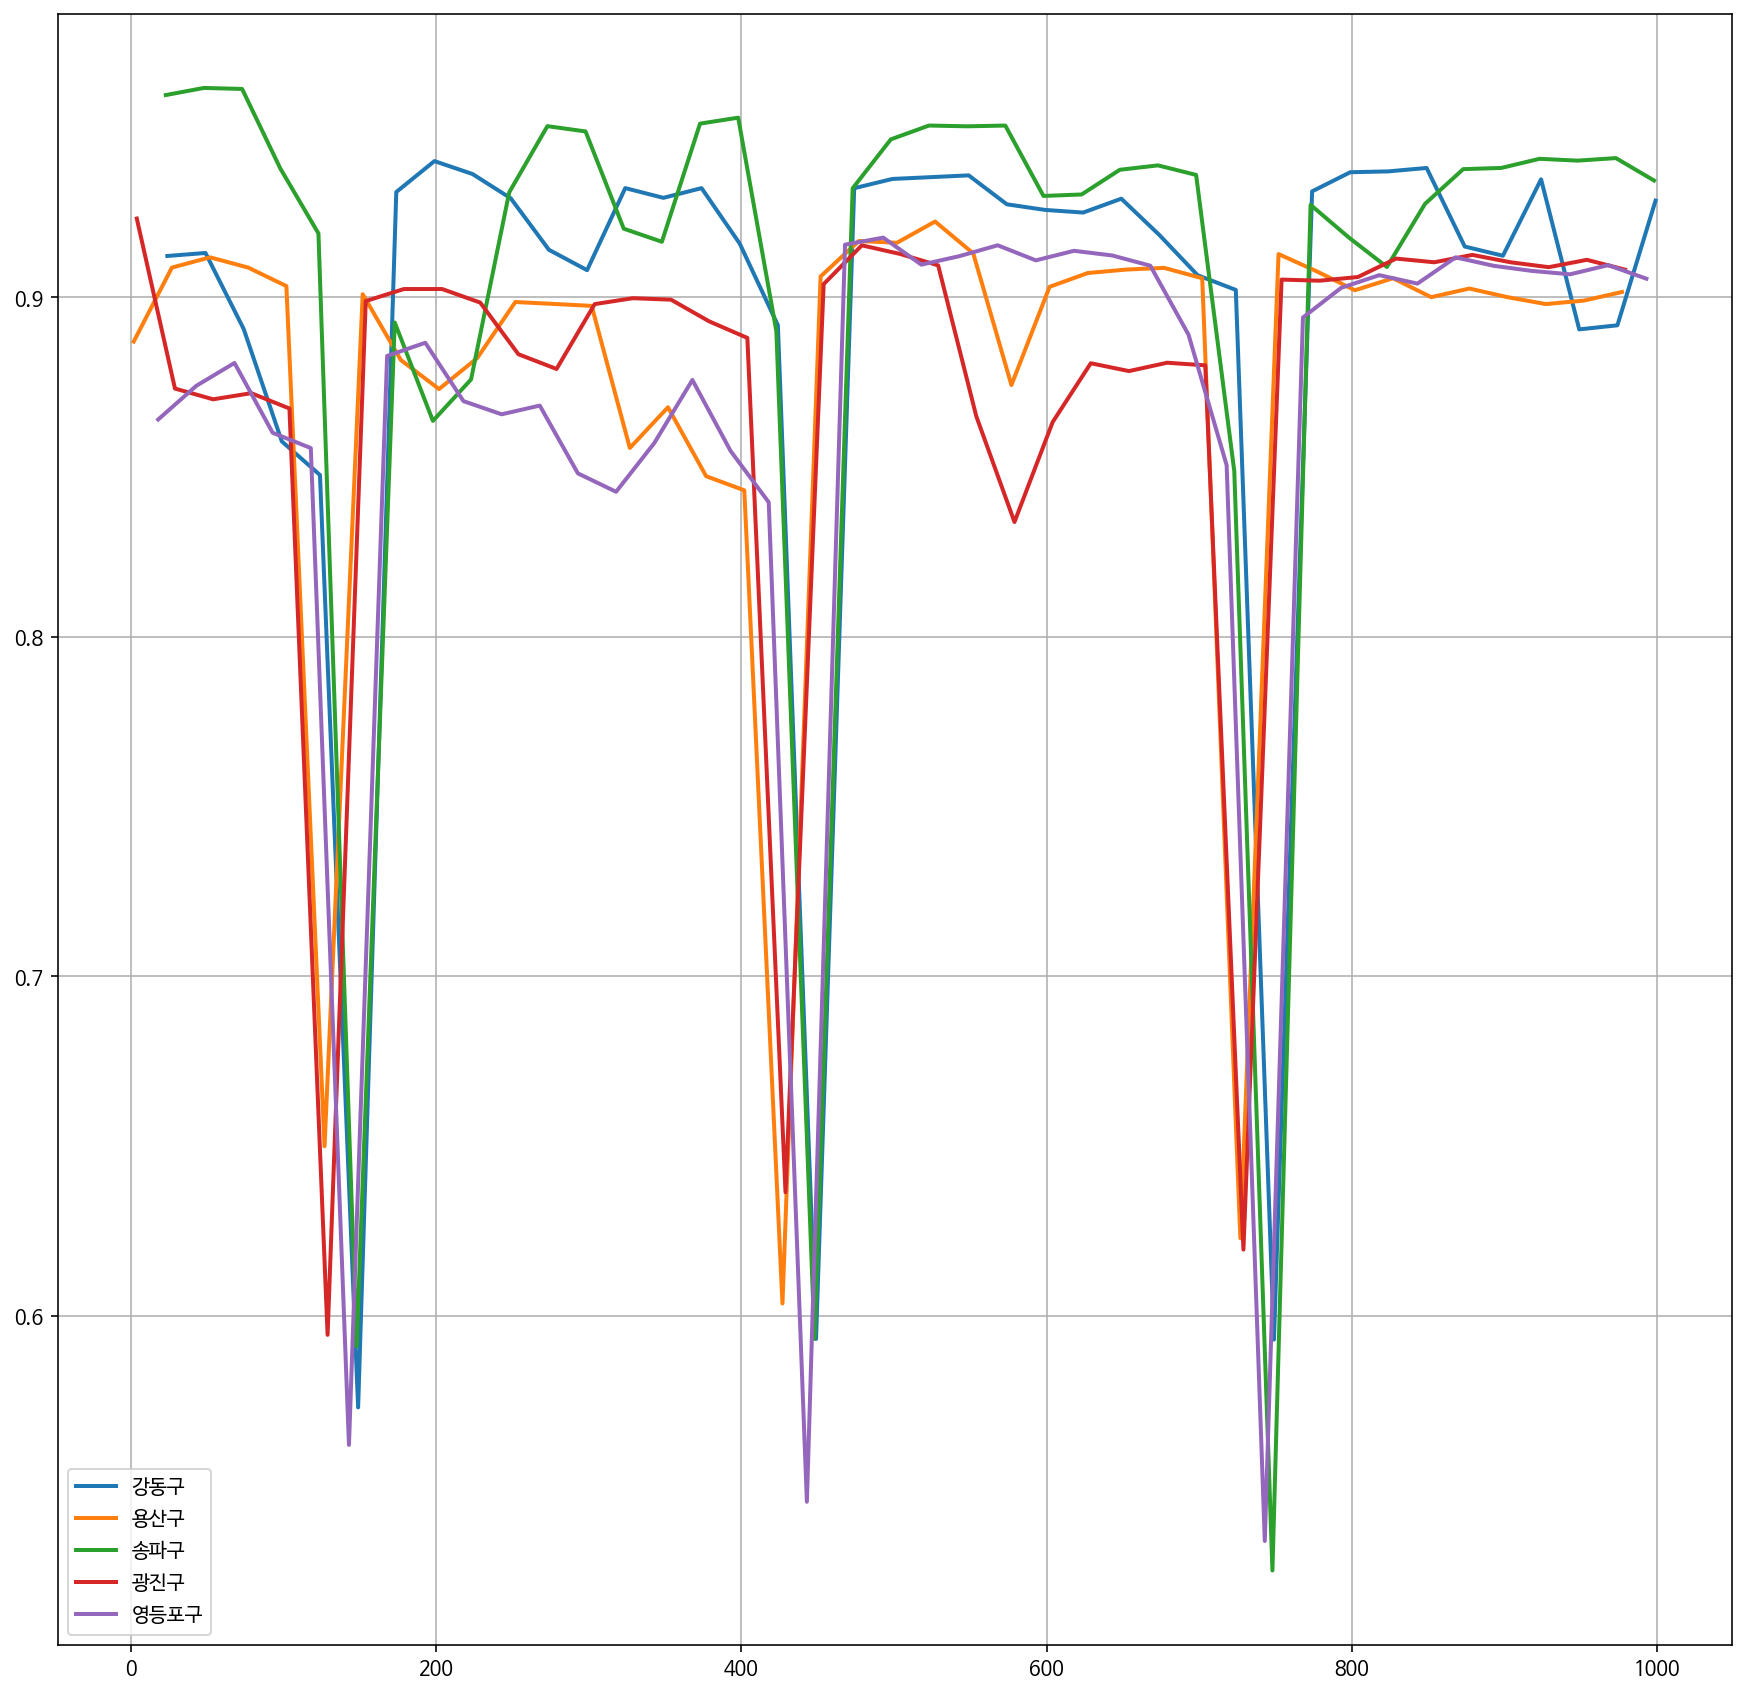

In [ ]:
plt.figure(figsize = (15,15))
for g in pd.Series(영유아정원률).sort_values(ascending=False)[-5:].index:
  df[df.gu==g]['공공_정원률'].plot(label=g ,legend=g)

In [ ]:
# 전세 보증금 증감에 따른 정원율 영향
보증금정원율 = dict()
for g in np.unique(df.gu.values):
  보증금정원율[g] = round(df[df.gu==g].corr()['단위당보증금']['어린이집_정원률'],3)
pd.Series(보증금정원율).sort_values(ascending=False)

마포구     0.307
서초구     0.287
성북구     0.244
강북구     0.183
송파구     0.182
은평구     0.179
서대문구    0.176
중구      0.160
성동구     0.152
동대문구    0.139
용산구     0.107
광진구     0.103
영등포구    0.095
강남구     0.060
구로구     0.059
동작구     0.046
중랑구     0.032
강동구     0.016
금천구     0.003
양천구    -0.027
관악구    -0.046
노원구    -0.064
도봉구    -0.114
강서구    -0.181
종로구    -0.372
dtype: float64

In [ ]:
매매가정원율 = dict()
for g in np.unique(df.gu.values):
  매매가정원율[g] = round(df[df.gu==g].corr()['단위당가격']['어린이집_정원률'],3)
매매가정원율
pd.Series(매매가정원율).sort_values(ascending=False)

서대문구    0.221
영등포구    0.189
광진구     0.114
서초구     0.110
중랑구     0.095
성동구     0.086
강북구     0.086
마포구     0.085
양천구     0.085
금천구     0.084
송파구     0.068
동대문구    0.044
동작구     0.038
성북구     0.013
구로구    -0.012
용산구    -0.033
은평구    -0.059
강서구    -0.078
강동구    -0.110
강남구    -0.118
관악구    -0.131
종로구    -0.151
노원구    -0.153
도봉구    -0.189
중구     -0.288
dtype: float64

### 구별 상관관계 점검

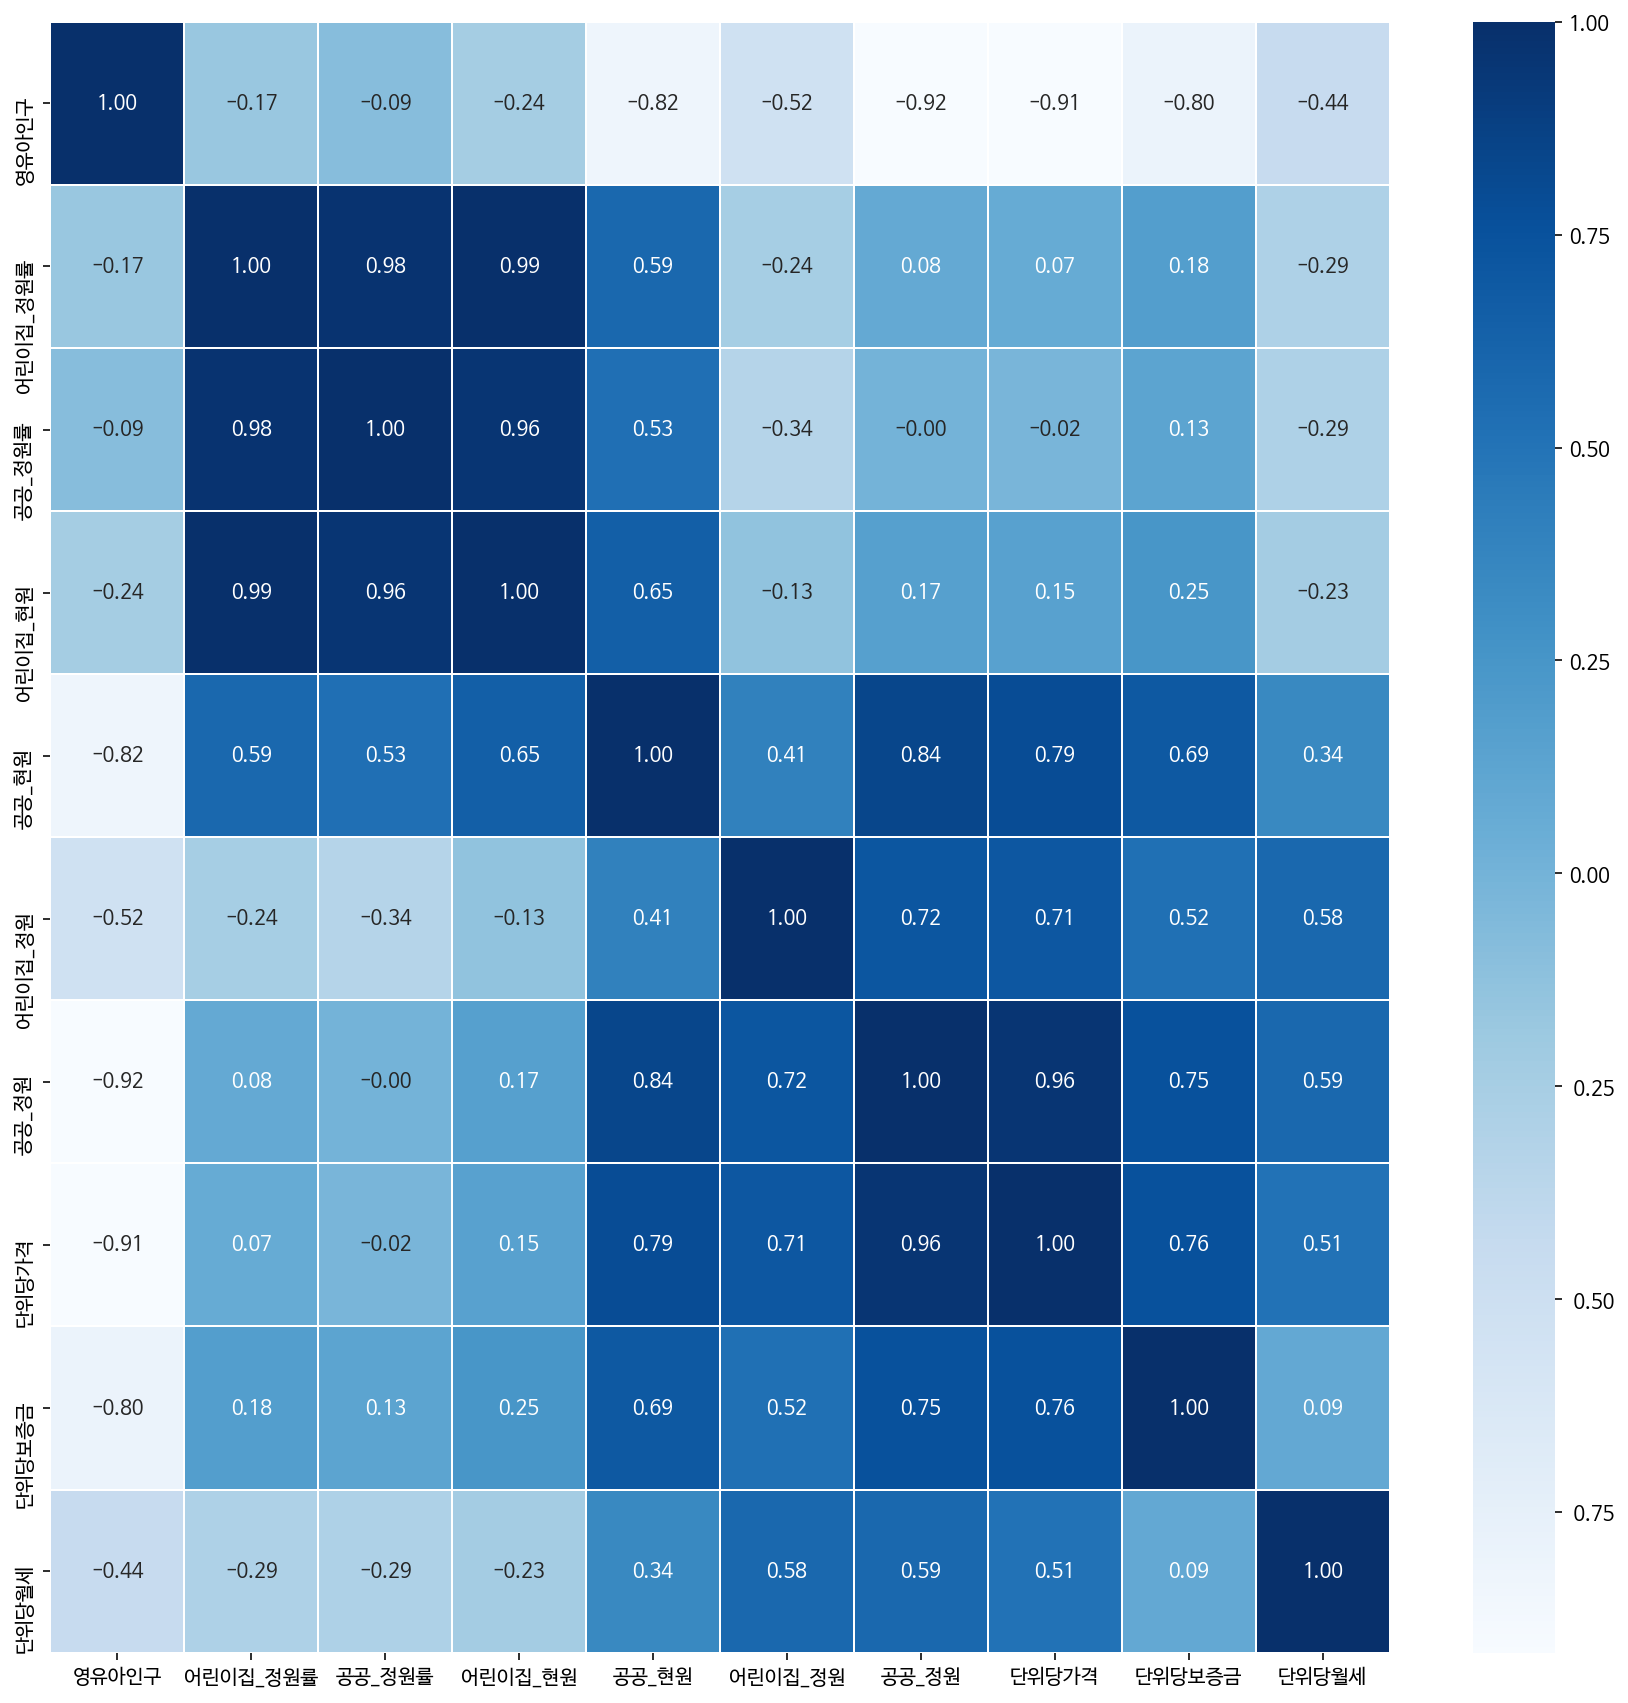

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(df[df.gu=='송파구'].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

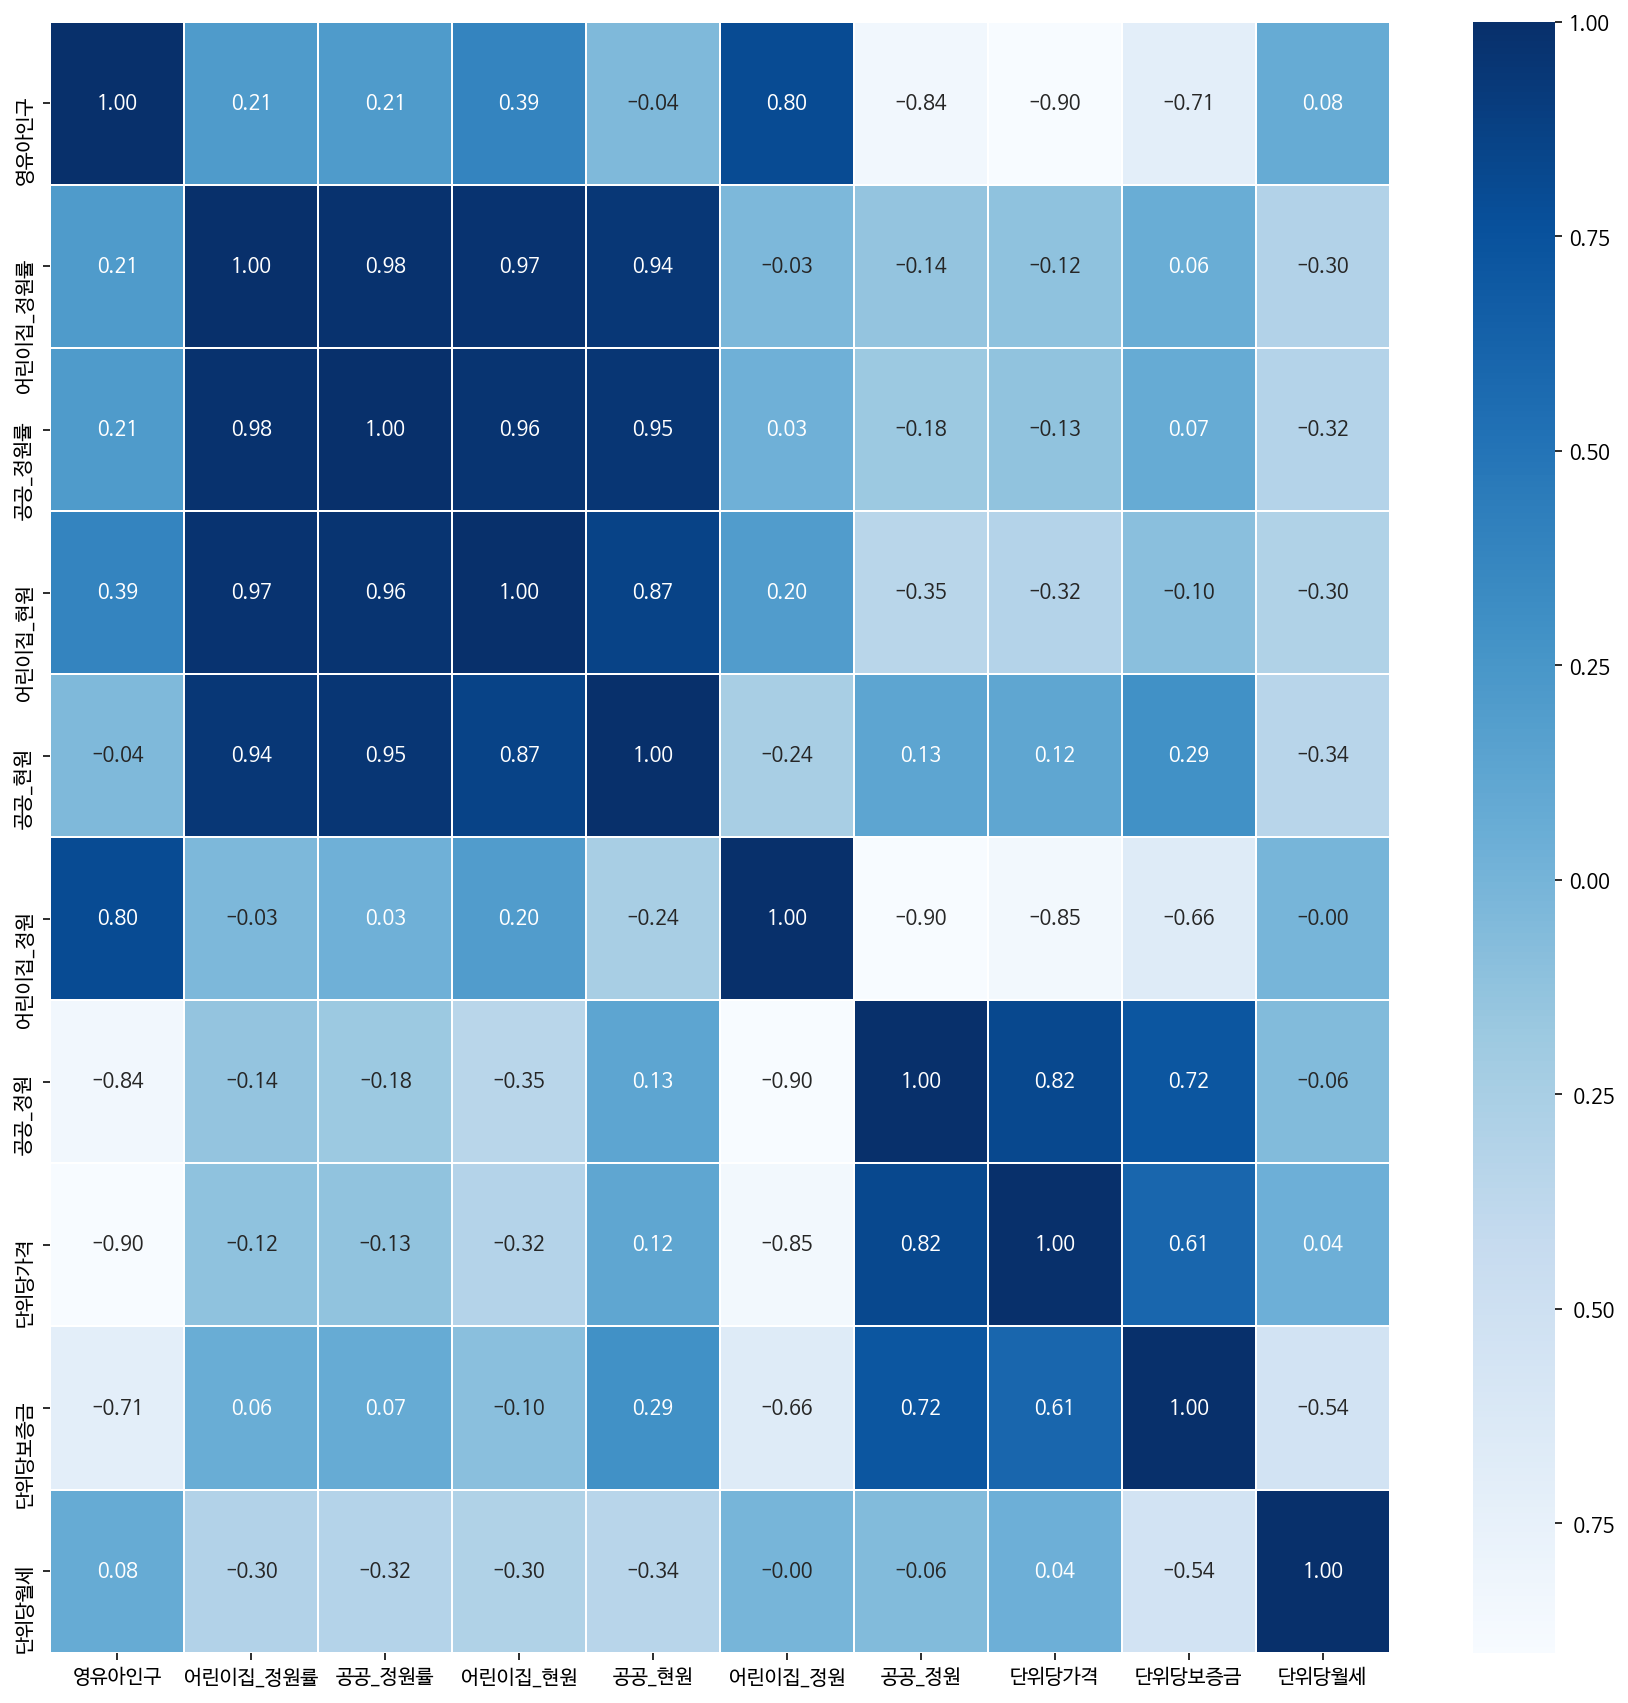

In [ ]:
plt.figure(figsize = (15,15))
sns.heatmap(df[df.gu=='강남구'].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
# df_hprice = pd.read_csv(url_hprice)
# df_hprice['date'] = df_hprice.year.apply(lambda x : str(x)) +'-' + df_hprice.month.apply(lambda x : str(x).zfill(2))

# df_hprice = df_hprice.drop(['year','month'],axis=1)
# df_hprice_A = df_hprice[df_hprice.kind == 1]
# df_hprice_A = df_hprice.drop('kind',axis=1)
# df_hprice_A.columns = ['gu',	'단위당매매/타입1',	'date']

# df_hprice_A = df_hprice_A['단위당매매/타입1'].groupby([df_hprice_A['gu'],df_hprice_A['date']]).mean().apply(pd.Series)
# df_hprice_A = df_hprice_A.reset_index()
# df_hprice_A.columns = ['gu','date',	'단위당매매/타입1']


# df_hprice_B = df_hprice[df_hprice.kind == 2]
# df_hprice_B = df_hprice.drop('kind',axis=1)
# df_hprice_B.columns = ['gu',	'단위당매매/타입2',	'date']

# df_hprice_B = df_hprice_B['단위당매매/타입2'].groupby([df_hprice_B['gu'],df_hprice_B['date']]).mean().apply(pd.Series)
# df_hprice_B = df_hprice_B.reset_index()
# df_hprice_B.columns = ['gu','date',	'단위당매매/타입2']

# df_hprice_C = df_hprice[df_hprice.kind == 3]
# df_hprice_C = df_hprice.drop('kind',axis=1)
# df_hprice_C.columns = ['gu',	'단위당매매/타입3',	'date']

# df_hprice_C = df_hprice_C['단위당매매/타입3'].groupby([df_hprice_C['gu'],df_hprice_C['date']]).mean().apply(pd.Series)
# df_hprice_C = df_hprice_C.reset_index()
# df_hprice_C.columns = ['gu','date',	'단위당매매/타입3']


# df_hprice_D = df_hprice[df_hprice.kind == 4]
# df_hprice_D = df_hprice.drop('kind',axis=1)
# df_hprice_D.columns = ['gu',	'단위당매매/타입4',	'date']

# df_hprice_D = df_hprice_D['단위당매매/타입4'].groupby([df_hprice_D['gu'],df_hprice_D['date']]).mean().apply(pd.Series)
# df_hprice_D = df_hprice_D.reset_index()
# df_hprice_D.columns = ['gu','date',	'단위당매매/타입4']

In [ ]:
# df = pd.merge(df,df_hprice_A,how='inner',on=['date','gu'])
# df = pd.merge(df,df_hprice_B,how='inner',on=['date','gu'])
# df = pd.merge(df,df_hprice_C,how='inner',on=['date','gu'])
# df = pd.merge(df,df_hprice_D,how='inner',on=['date','gu'])